# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

`Цель` – научиться определять рыночную стоимость объектов недвижимости. 

`Задача` — установить параметры, что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### 1. Откроем файл с данными и изучим общую информацию. <a id='1'></a>

Импортируем необходимые библиотеки, считываем данные из csv-файла в датафрейм и сохраняем в переменную data.

In [1]:
import pandas as pd
import seaborn as sb
import pylab as pl
import numpy as np

from matplotlib.ticker import FuncFormatter

In [2]:
try:
    data = pd.read_csv('datasets/real_estate_data.csv')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv')


Выведем первые 10 строчек датафрейма data на экран

In [3]:
data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились в одну строку из-за разделителей в формате '\t'.
Прочитаем файл с учетом разделителей и выведем первые 20 строк.

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

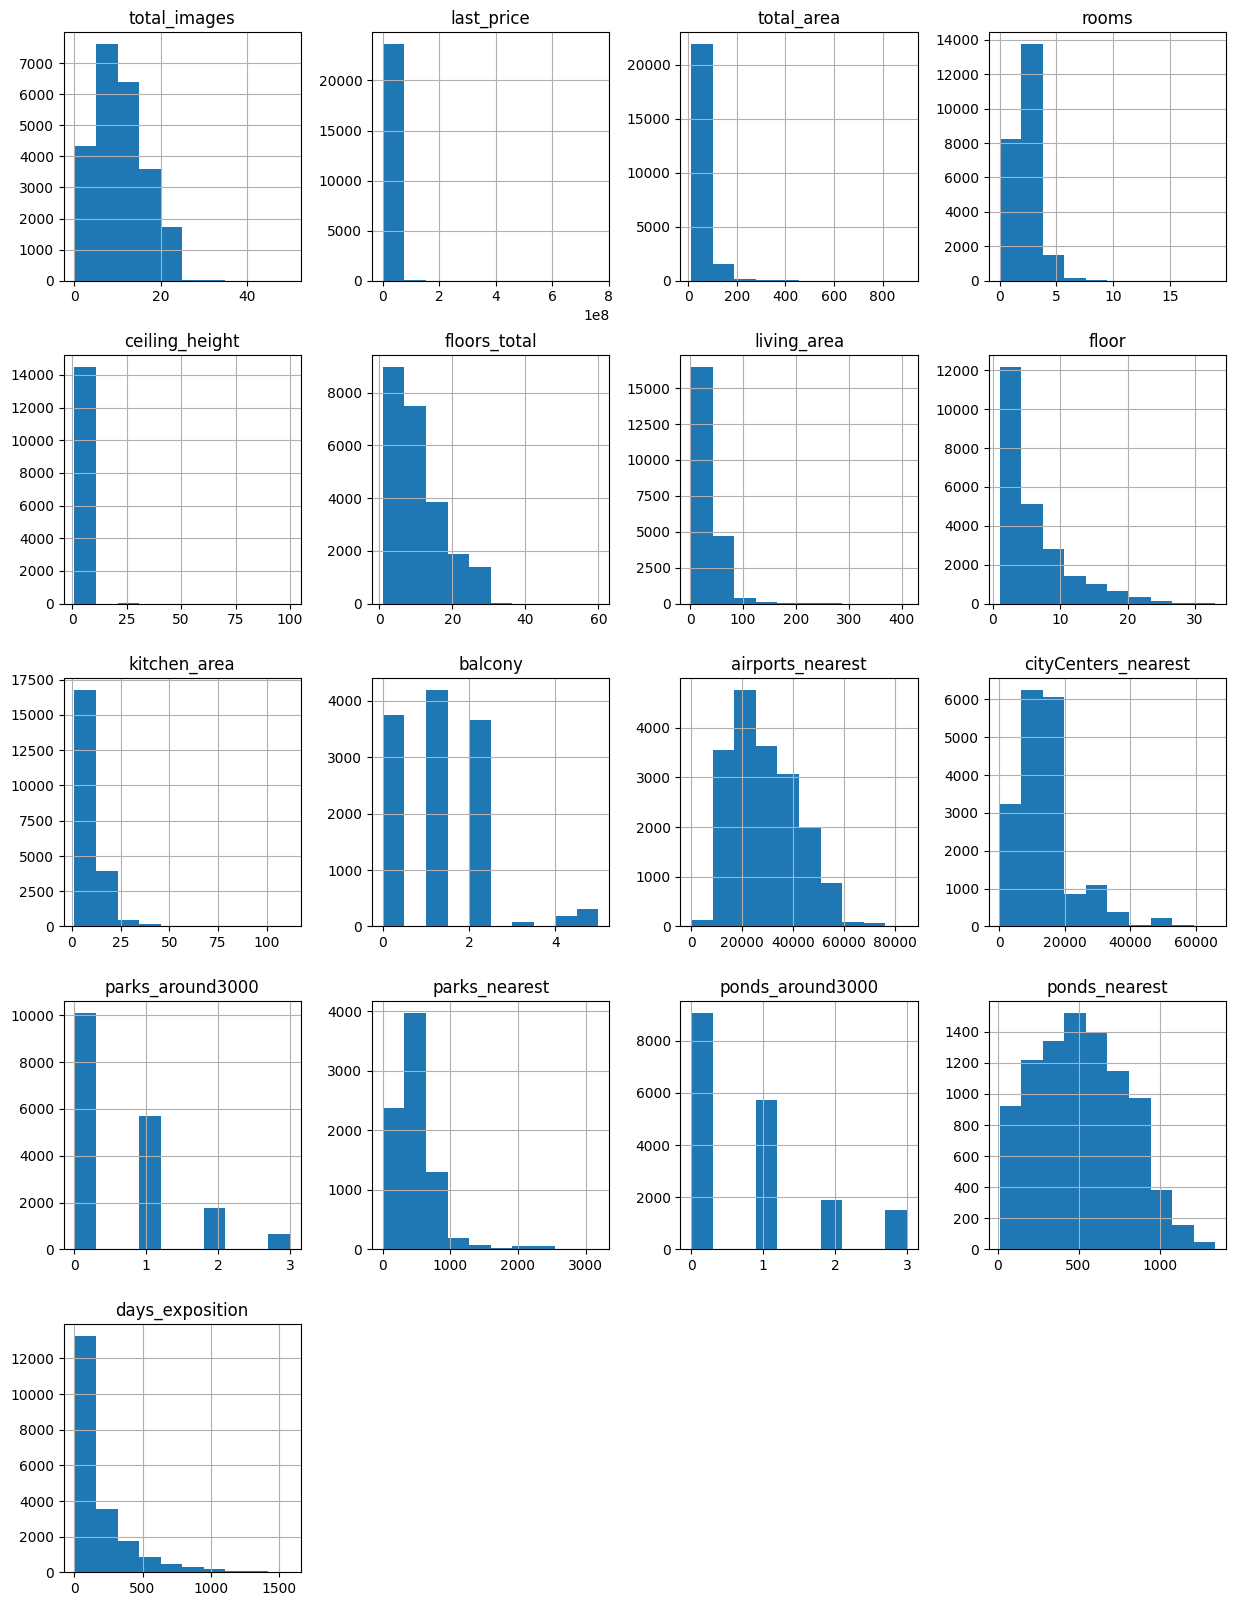

In [6]:
data.hist(figsize=(15, 20));

`В датафрейме 22 столбца и 23699 строк, в некоторых встречаютя пропуски.
Займемся предобработкой данных:`

### 2. Предобработка данных <a id='2'></a>

**Меняем стиль заголовков:**

In [7]:
print(data.columns) # перечень названий столбцов таблицы data 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [8]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 
                              'parks_around3000':'parks_around_3000', 
                              'ponds_around3000':'ponds_around_3000'}) 
# переименуем столбцы

In [9]:
print(data.columns)
# проверим, как изменились названия

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


**Определим количество пропущенных значений в каждом столбце:**

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для большей наглядности построим тепловую карту:

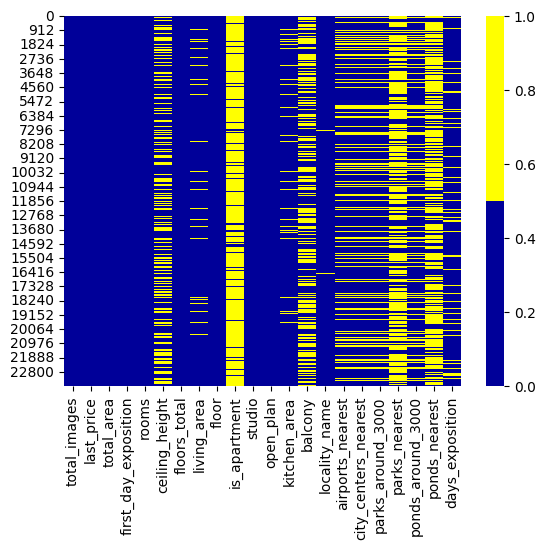

In [11]:
cols = data.columns[:23699]
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sb.heatmap(data[cols].isnull(), cmap=sb.color_palette(colours));

**Обнаружены пропуски в столбцах:**
* `locality_name` (название **населенного пункта**) заполнить пропуски в названии населенного пункта мы не можем, поэтому целесообразно удалить строки датафрейма с пропусками в данном столбце.



In [12]:
data = data.dropna(subset=['locality_name'])

* `floors_total` (**всего этажей**). На этажность так же больше влияет населенный пункт. Заполним пропущенные значения в данном столбце  медианным значением этажности по населенным пунктам

In [13]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == t), 'floors_total'].median()

* `living_area` (**жилая площадь, м²**).
Заполним пропущенные значения в данном столбце медианным значением в зависимости от количества комнат

In [14]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

* `ceiling_height` - **высота потолков**, как правило, стандартная величина в многоквартирных домах и отличается незначительно, однако в таблице встречаются аномалии в данных, которые мы исправим в последующих шагах. На данном этапе пропуски мы можем заменить медианным значением высоты.  

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


* `is_apartment` (тип недвижимости - **аппартаменты**) - пропуски в этом столбце, вероятно, указывают на то, что недвижимость не является аппартаментами. Можем заменить отсутствующие значения на False.

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False) 

* `balcony` (количество **балконов**) - если продавец не указал данные в этом столбце, то, скорее всего, в квартире балконов нет, пропуски, в таком случае, мы можем заменить на 0.

In [17]:
data['balcony'] = data['balcony'].fillna(0) 

* `kitchen_area ` (**площадь кухни**) на значения текущего столбца, по большей мере, влияет общая площадь квартиры. Заполним пропуски в данных медианным значением по общей площади.

In [18]:
# data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Пропуски в данных следующих категорий:
- `airports_nearest`         5542
- `city_centers_nearest`     5519
- `parks_around_3000`        5518
- `parks_nearest`           15620
- `ponds_around_3000`        5518
- `ponds_nearest`           14589

встерчаются **в деревнях и поселках**, что может быть **связано с далеким расположением аэропортов*, **отсутствием облагороженных парков и водоемов** в населенных пунктах перечисленных типов(расстояние до аэропорта, а так же до парка/водоема заменим на значение больше максимального в столбце, а количественные показатели в радиусе 3000м заменим на 0). Расстояние **до центра города** заменим так же значением сравнимо большим, чем максимальное, встречающееся в таблице, так как в небольших населенных пунктах центр поселения находится относительно близко, поэтому для данных категорий предположим, что то самое сравнимо большое значение бует расстоянием до ближайшего города: 



In [19]:
data['airports_nearest'].max()

84869.0

In [20]:
data['city_centers_nearest'].max()

65968.0

In [21]:
data['parks_nearest'].max()

3190.0

In [22]:
data['ponds_nearest'].max()

1344.0

In [23]:
# # наибольшее расстояние до центра города 65968(м), заменим на большее значение, например 100(км)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(100000) 

* `days_exposition`(сколько **дней было размещено объявление**) рассчитать данный показатель возможности нет, поэтому для удобства так же заменим медианным значением по столбцу, так как на скорость продажи квартиры может влиять целый комплекс параметров. 

In [24]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

Мы наблюдали пропуски в столбцах:
- `ceiling_height`           9195
- `floors_total`               86
- `living_area`              1903
- `is_apartment`            20924
- `kitchen_area`             2278
- `balcony`                 11519
- `locality_name`              49
Это данные, вписанные пользователями.  

А так же большое количество пропусков встречается в столбцах, заполненных автоматичеки, на основании картографических данных: 
- `airports_nearest`         5542
- `city_centers_nearest`     5519
- `parks_around_3000`        5518
- `parks_nearest`           15620
- `ponds_around_3000`        5518
- `ponds_nearest`           14589
- `days_exposition`          3181

**Пропуски в данных могли появиться по следующим причинам:**
1. Ошибки при заполнении таблицы пользователями(например, при отсутствии балкона в таблице оставили пустую ячейку, та же ситуация со столбцом "is_apartment", где вместо false пропущено значение) 
2. Пропуски в столбцах, занесенных в датафрейм автоматически, могли появиться по причине отсутствия картографических данных
3. Кроме того, возникновение пропусков может быть связано  с техническими ошибками при формировании таблицы (сбой во время выгрузки данных на анализ или при объединении данных в единый файл)


In [25]:
# еще раз проверим наличие пропусков в таблице:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest        0
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition             0
dtype: int64

**В некоторых столбцах необходимо изменить тип данных, а именно:**

 * `first_day_exposition`  меняем `object -> datetime` для удобства последующих вычислений удобее использовать формат даты и времени
 * `floors_total`  количество этажей в доме  - всегда целое число, меняем `float64 -> int64`
 * `is_apartment` является ли жилье аппартаментами (варианта 2: либо true, либо false) - меняем на булев тип `object -> bool`
 * `balcony`аналогично с количеством этажей`float64 -> int64`
 * `day_exposition` нас интересует количество дней, а это тоже целое число`float64 -> int64`
    

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],\
                                              format='%Y-%m-%d')

In [27]:
data['floors_total'] = data['floors_total'].astype(int)

In [28]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [29]:
data['balcony'] = data['balcony'].astype(int)

In [30]:
data['days_exposition'] = data['days_exposition'].astype(int)

**Посчитаем явные дубликаты в таблице:**

In [31]:
data.duplicated().sum()

0

Определим **уникальные значения в названиях населенных пунктов**. 
Для устранения неявных дубликатов при наличии таковых.

In [32]:
data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [33]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

data['locality_name'] = data['locality_name'].str.replace('городской поселок', \
                                                          'поселок городского типа', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', \
                                                          'поселок', regex=True)
# устраняем возможные дубликаты в типах населенных пунктов.

**Найдем и устраним редкие и выбивающиеся значения:**

Изучим `ценовой показатель`:

count    2.206400e+04
mean     5.408781e+06
std      2.893406e+06
min      1.500000e+06
25%      3.499000e+06
50%      4.600000e+06
75%      6.500000e+06
max      1.700000e+07
Name: last_price, dtype: float64

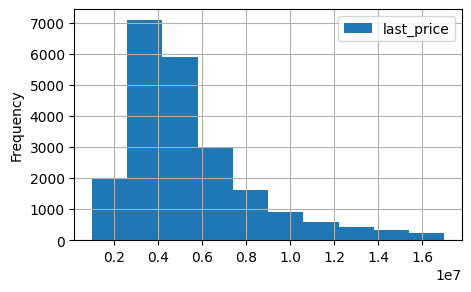

In [34]:
data = data.loc[(data['last_price']<= 17.e+6)&(data['last_price']>= 1.5e+6)]
#отбросим значения больше 17 млн и меньше 1.5 млн рублей
data.plot(y = 'last_price', kind = 'hist', bins = 10,\
          grid=True, range = (1000000,17000000), figsize = (5,3))
data['last_price'].describe()


Распределение данных нормальное. Встречаются выбивающиеся значения, избавляемся от них. Исключаем жилье стоимостью менее 1.5 млн рублей и более 17 млн рублей.

Изучим `общую площадь`:

count    22036.000000
mean        56.169996
std         22.591907
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64

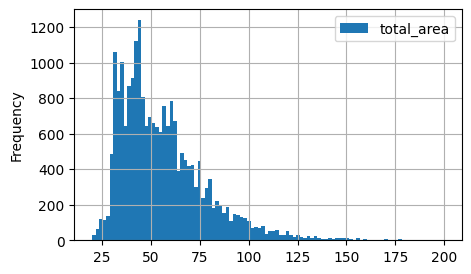

In [35]:
data = data.loc[data['total_area']<= 200]
# исключим жилье, площадью более 200 м²
data.plot(y = 'total_area', kind = 'hist', bins = 100,\
          grid=True, figsize = (5,3), range = (20,200))
data['total_area'].describe()

Распределение данных нормальное. Встречаются выбивающиеся значения больше 200 м², исключаем их.  

Изучим `количество комнат`:

In [36]:
data['rooms'].describe()

count    22036.000000
mean         1.999818
std          0.962374
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

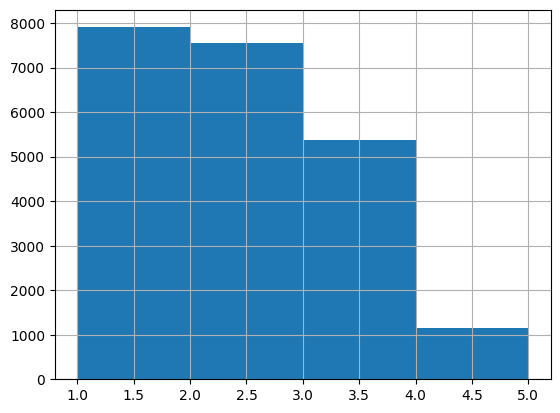

In [37]:
data.loc[data['rooms'] == 0, 'rooms'] = 1
# вероятно, 0 комнат указано в квартирах-студиях, заменим нулевые значения 1
data.loc[data['rooms']>6, 'rooms'] = 5
# больше 5 комнат встречается крайне редко, отбросим эти значения
data['rooms'].hist(bins=4, range=(1,5));

Чаще всего в выборке встречаются 1 и 2-комнатные квартиры, чуть реже 3-комнатное жилье, далее чем болльше количество комнат, тем меньше представлено объявлений. 
Жилье с количеством комнат больше 5 встречается крайне редко, отбросим эти значения.
Кроме того, в данном столбце встречаются нулевые значения, заменим нулевые значения единицей (будем считать квартиры-студии однокомнатными).

Изучим показатель `высоты потолков`:

count    22036.000000
mean         2.714660
std          1.018164
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

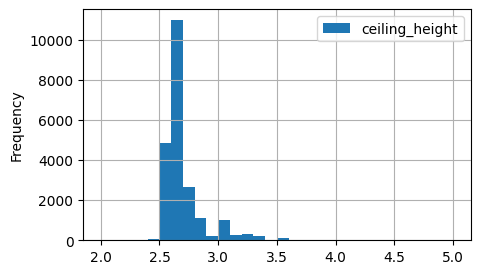

In [38]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30,\
          range = (2,5), grid=True, figsize = (5,3))
data['ceiling_height'].describe()

Минимальная высота потолка 1м, максимальная 100м. Данные значения не могут быть реальными, поэтому на данном этапе выведем в порядке возрастания все уникальные значения, для исключения других недостоверных данных.

In [39]:
data['ceiling_height'].sort_values().unique() 

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.25,   2.3 ,   2.34,   2.4 ,
         2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,   2.52,
         2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,   2.6 ,
         2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,   2.68,
         2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,   2.76,
         2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,   2.84,
         2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,   2.92,
         2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,   3.  ,
         3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,   3.08,
         3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,   3.16,
         3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,   3.25,
         3.26,   3.27,   3.28,   3.3 ,   3.31,   3.32,   3.33,   3.34,
         3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,   3.42,   3.44,
         3.45,   3.46,   3.47,   3.48,   3.49,   3.5 ,   3.52,   3.53,
      

Стандартная высота потолков в новостройках варьируется в пределах от 2.5-2.7 м, для элитного жилья показатель может доходить до 3.2м, в петербургских "коммуналках" высота потолков достигает 3.5м, а иногда и 5м. По словам экспертов, в петербуржском старом фонде можно встретить квартиры, в которых высота потолков достигает 9 м. 
Пусть высота потолков в Петербурге и Ленинградской области, в среднем от **2.5-5м.** Заменим значения меньше минимальной высоты, установленной нами, на 2.5м, а больше- на 5м(третий квартиль до обработки 2,7м, следовательно исправление выбивающихся значений не приведет к искажению результатов). Так же логично предположить, что значения 25м - 32м на самом деле соответствуют высоте 2.5-3.2м. 

In [40]:
data.loc[data['ceiling_height']<2.5, 'ceiling_height']=2.5
data.loc[data['ceiling_height']>=25, 'ceiling_height']*0.1
data.loc[data['ceiling_height']>5, 'ceiling_height']=5
data['ceiling_height'].sort_values().unique() 

array([2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39,
       3.4 , 3.42, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.52, 3.53,
       3.54, 3.55, 3.56, 3.57, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67,
       3.68, 3.7 , 3.75, 3.78, 3.8 , 3.83, 3.84, 3.85, 3.88, 3.9 , 3.93,
       3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.25, 4.3 ,
       4.37, 4.4 , 4.5 , 4.7 , 4.8 , 5.  ])

`На этапе предобработки данных мы изменили стиль заголовков, определили и по возможности заменили пропуски в таблице, выделили предположительные приичины появления пустых ячеек. Изменили типы данных, где это было необходимо. После чего обнаружили и устранили редкие и выбивающиеся значения в столбцах.`


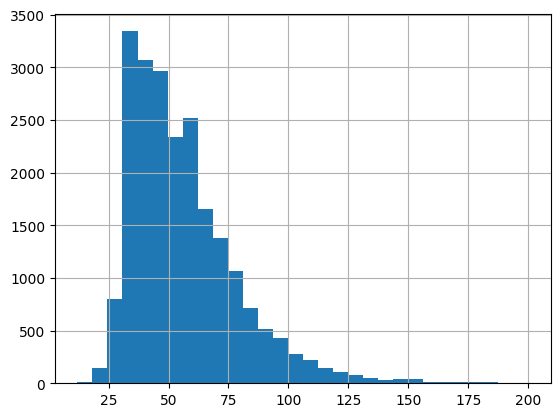

In [41]:
#код ревьюера
data['total_area'].hist(bins=30);

### 3. Посчитаем и добавим в таблицу новые столбцы <a id='3'></a>


Добавим в таблицу столбец :
- `'price_one_meter2'` **со стоимостью одного квадратного метра:**

*стоимость  одного квадратного метра рассчитывается от общей площади жилья*

In [42]:
data['price_one_meter2'] = data['last_price']/data['total_area']
# изменим тип данных столбца
data['price_one_meter2'] = data['price_one_meter2'].astype('int64')

- `weekday_exposition` **день недели публикации** объявления (0 — понедельник, 1 — вторник и так далее)
- `month_exposition` **месяц публикации** объявления
- `year_exposition` **год** публикации объявления

In [43]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

- `floor_type` **тип этажа квартиры**

In [44]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis = 1)

- `nearest_to_center` расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [45]:
# переведем из м в км и округлим до целых значений
data['nearest_to_center'] = (data['city_centers_nearest']/1000).astype(int)

`На текущем этапе рассчитали параметры, необходимые для дальнейшего анализа и добавили в таблицу новые столбцы.`

### 4. Проведем исследовательский анализ данных
#### 4.1. Изучим следующие параменты: <a id='4.1'></a>

  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры;
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

Text(0, 0.5, 'Кол-во квартир')

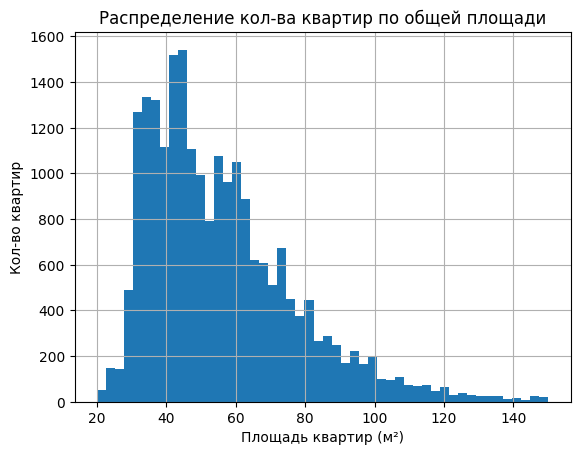

In [46]:
data_hist = data['total_area'].plot(kind='hist', bins=50, range=(20,150),\
                                    title='Распределение кол-ва квартир по общей площади', grid=True)
data_hist.set_xlabel('Площадь квартир (м²)')
data_hist.set_ylabel('Кол-во квартир')

Преобладают квартиры площадью от 30 до 45 м², вторые по распространенности, - квартиры площадью от 50-65м², более 2400 квартир имеют пощадь от 70-75 м², жилье большей площади встречается реже, но все же присутствуют квартиры площадью до 200 и даже до 900м².

Text(0, 0.5, 'Кол-во квартир')

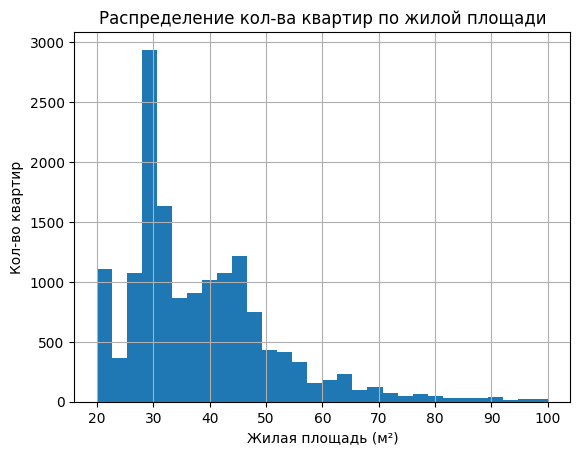

In [47]:
data_hist = data['living_area'].plot(kind='hist', bins=30, range=(20,100),\
                                     title='Распределение кол-ва квартир по жилой площади', grid=True)
data_hist.set_xlabel('Жилая площадь (м²)')
data_hist.set_ylabel('Кол-во квартир')

Распеределение количества квартир по жилой площади совпадает с предыдущим графиком. Преобладают квартиры с жилой площадью 27-30 м², что соответствует пику количества квартир общей площадью от 30 до 45 м² (за вычетом площадей нежилых помещений).

Text(0, 0.5, 'Кол-во квартир')

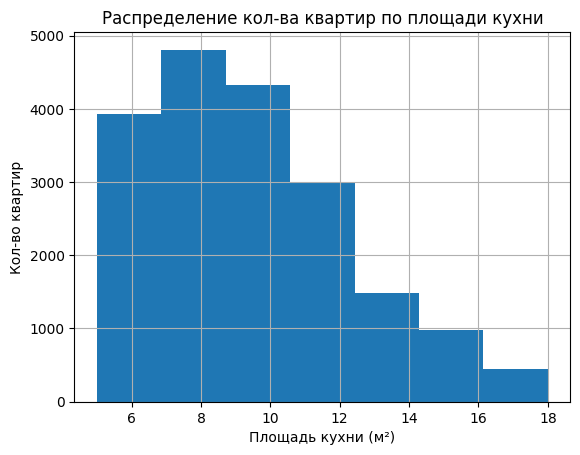

In [48]:
data_hist = data['kitchen_area'].plot(kind='hist', bins=7, range=(5,18),\
                                     title='Распределение кол-ва квартир по площади кухни', grid=True)
data_hist.set_xlabel('Площадь кухни (м²)')
data_hist.set_ylabel('Кол-во квартир')

Чаще всего в Санкт-Петербурге и ленинградской области площадь кухни в жилых домах 9-10.5 м², чуть реже встречаются квартиры площадью 7-8 м² и квартиры с площадью кухни более 10.5 м², а так же можно найти варианты с площадью до 112 м².
Площадь 0 м², вероятно указана в квартирах-студиях, где отсутствует как таковое разграничение между кухней и комнатой.

count    2.203600e+04
mean     5.396617e+06
std      2.874059e+06
min      1.500000e+06
25%      3.497250e+06
50%      4.600000e+06
75%      6.500000e+06
max      1.700000e+07
Name: last_price, dtype: float64

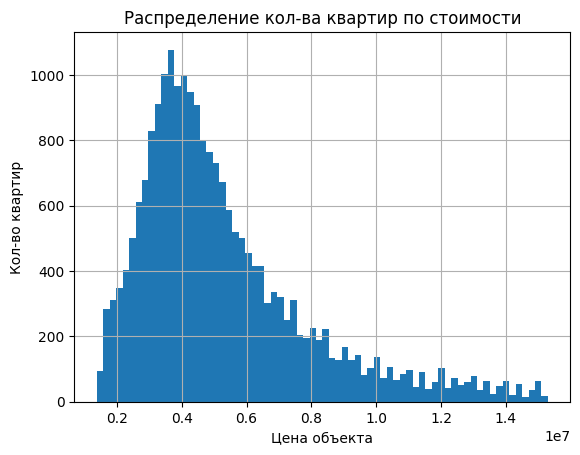

In [49]:
data_hist = data['last_price'].plot(kind='hist', bins=70, range=(1380000,15300000),\
                                     title='Распределение кол-ва квартир по стоимости', grid=True)
data_hist.set_xlabel('Цена объекта')
data_hist.set_ylabel('Кол-во квартир')
data['last_price'].describe()

Стоимость квартир в Санкт-Петербурге и области в среднем составляет 3-5 млн рублей, однако есть варианты стоимостью больше 70 млн рублей. Логично, что стоимость жилья в Петербурге и области будет значительно разниться, поэтому необходим более детальный анализ стоимоcти жилья, с учетом дополнительных параметров.

count    22036.000000
mean         2.007397
std          0.944327
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

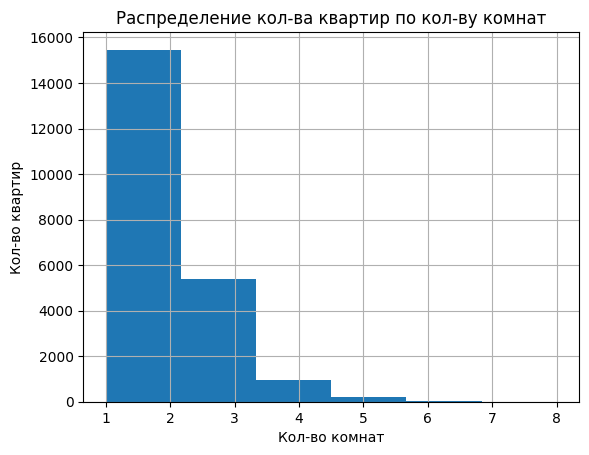

In [50]:
data_hist = data['rooms'].plot(kind='hist', bins=data['rooms'].max(), range=(1,8),\
                                     title='Распределение кол-ва квартир по кол-ву комнат', grid=True)
data_hist.set_xlabel('Кол-во комнат')
data_hist.set_ylabel('Кол-во квартир')
data['rooms'].describe()

Большая часть объявлений приходится на 1- и 2-комнатные квартиры, чуть меньше 3 комнатных квартир, встречаются объявления продажи 4 и 5- комнатных квартир в некоторых объявлениях продаются квартиры с несколькими десятками комнат.

count    22036.000000
mean         2.688734
std          0.213535
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

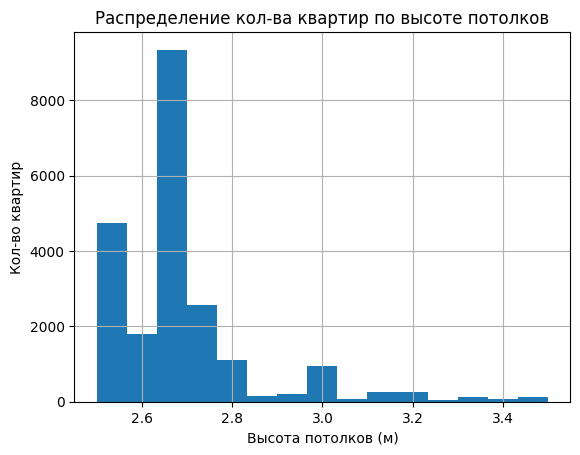

In [51]:
data_hist = data['ceiling_height'].plot(kind='hist', bins=15, range=(2.5,3.5),\
                                     title='Распределение кол-ва квартир по высоте потолков', grid=True)
data_hist.set_xlabel('Высота потолков (м)')
data_hist.set_ylabel('Кол-во квартир')
data['ceiling_height'].describe()

Высота потолков в объявлениях стандартная: от 2.4 до 2.75 м, в большинстве квартир высота потолков составляет 2,7м, в  элитных жилых комплексах доходит до 3 метров. В Петрбурге в зданиях старого фонда можно найти квартиры с высотой потолка в 2 раза больше стандартной.

Text(0, 0.5, 'Кол-во квартир')

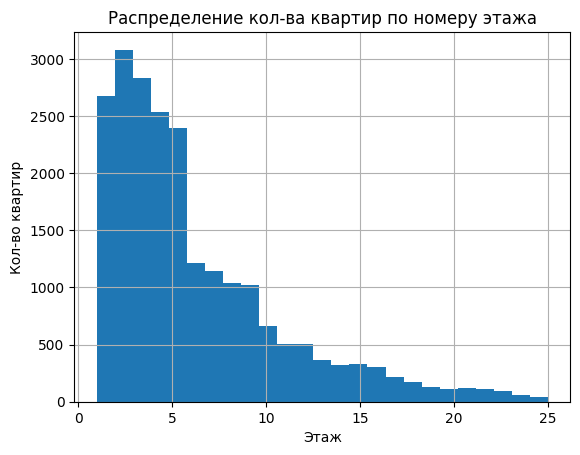

In [52]:
data_hist = data['floor'].plot(kind='hist', bins=25, range=(1,25),\
                                     title='Распределение кол-ва квартир по номеру этажа', grid=True)
data_hist.set_xlabel('Этаж')
data_hist.set_ylabel('Кол-во квартир')

Основное распределение квартир по этажам с 1-5, вероятно, связано с тем, что до революции в Петербурге существовал регламент, запрещающий возводить в городе здания выше 23,5 метров — это высота карниза Зимнего дворца. А так же с тем, что в выборке присутствуют объявления не только из Санкт-Петербурга, но и из области. Дома в небольших городах, таких как Пушкин, Выборг, жилье в поселках и деревнях скорее малоэтажное.
Высотки и 9-этажные здания, скорее, встречаются в более молодых районах Северной Столицы.

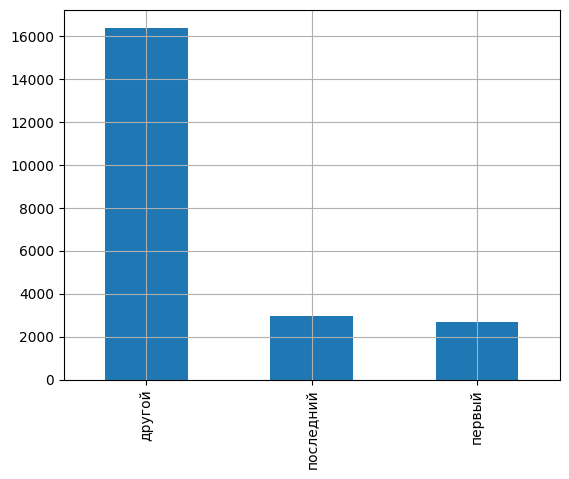

In [53]:
data['floor_type'].value_counts().plot(kind='bar', grid=True);

Больше всего кравтир ожидаемо продается не на первом и не на последнем этажах, таких квартир в принципе доджно быть сравнимо больше в выборке. 

Text(0, 0.5, 'Кол-во квартир')

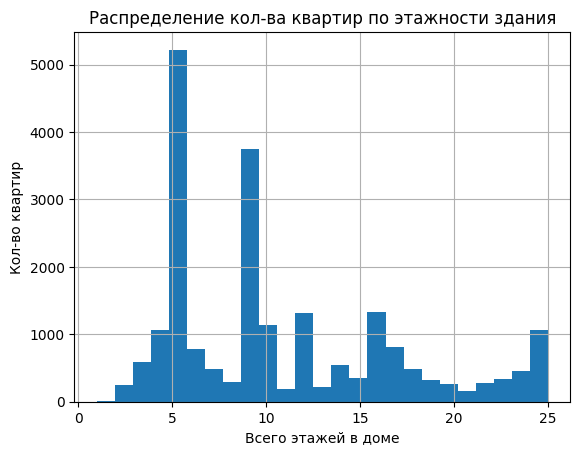

In [54]:
data_hist = data['floors_total'].plot(kind='hist', bins=25, range=(1,25),\
                                     title='Распределение кол-ва квартир по этажности здания', grid=True)
data_hist.set_xlabel('Всего этажей в доме')
data_hist.set_ylabel('Кол-во квартир')

Подтверждая рассуждения о распределении квартир по номеру этажа на рафике, представленном выше, можем добавить, что дома в большинстве своем строились по типовым проектам, по этажности преобладают 5-этажки, 9-этажные дома, и примерно одинаковое количество 4,12,16,25-этажных зданий.

Text(0, 0.5, 'Кол-во квартир')

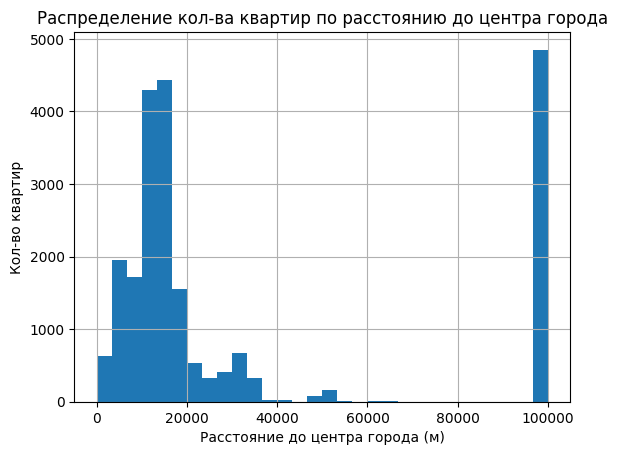

In [55]:
data_hist = data['city_centers_nearest'].plot(kind='hist', bins=30, range=(2,100000),\
                                     title='Распределение кол-ва квартир по расстоянию до центра города', grid=True)
data_hist.set_xlabel('Расстояние до центра города (м)')
data_hist.set_ylabel('Кол-во квартир')

Основная часть квартир располагаются на расстоянии до 20 км от центра города. В городах Ленинградской области в связи с относительно небольшой площадью расстояние до центра города будет меньше. В Санкт-Петербурге, расстояние от некоторых районов до центра города достигает 30 км, большие значения на графике, в том числе значение более 5 тысяч квартир на расстоянии 100 км, скорее относятся к деревням и поселкам(указано расстояние до ближайшего города).


Text(0, 0.5, 'Кол-во квартир')

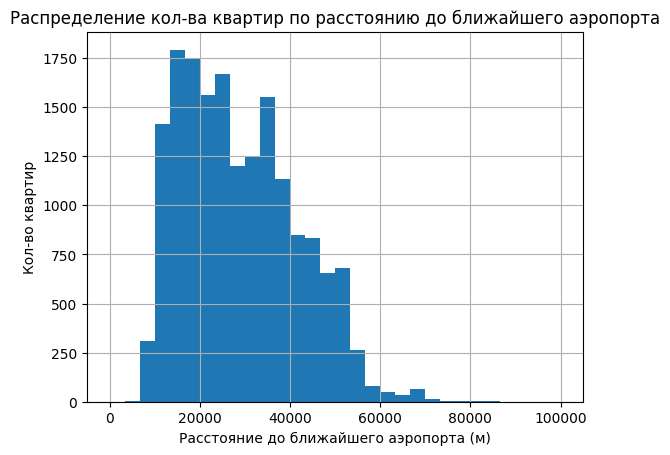

In [56]:
data_hist = data['airports_nearest'].plot(kind='hist', bins=30, range=(10,100000),\
                                     title='Распределение кол-ва квартир по расстоянию до ближайшего аэропорта', grid=True)
data_hist.set_xlabel('Расстояние до ближайшего аэропорта (м)')
data_hist.set_ylabel('Кол-во квартир')

В основном, расстояние от представленных квартир до ближайшего аэропорта составляет от 12 - 28км, что соотносится с расстоянием от строений в Санкт-Петербурге или близлежащих населенных пунктов до аэропорта Пулково. Большие расстояния, относятся к поселениям Ленинградской области.

Text(0, 0.5, 'Кол-во квартир')

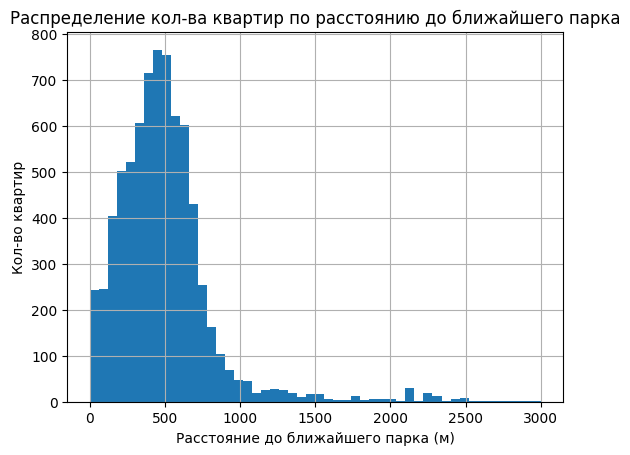

In [57]:
data_hist = data['parks_nearest'].plot(kind='hist', bins=50, range=(0,3000),\
                                     title='Распределение кол-ва квартир по расстоянию до ближайшего парка', grid=True)
data_hist.set_xlabel('Расстояние до ближайшего парка (м)')
data_hist.set_ylabel('Кол-во квартир')

В большинстве объявлений расстояние до ближайшего парка составляет от 100 - 700 метров, скорее всего, это связано с тем, что большая доля объявлений - квартиры в Санкт-Петербурге, где общая площадь зелёных насаждений превышает 31 тысячу га, в их числе 68 парков, 166 садов, 730 скверов. Как было отмечено ранее, в деревнях и поселках благоустроенные парки могут отсутсвовать. 

Text(0, 0.5, 'Кол-во квартир')

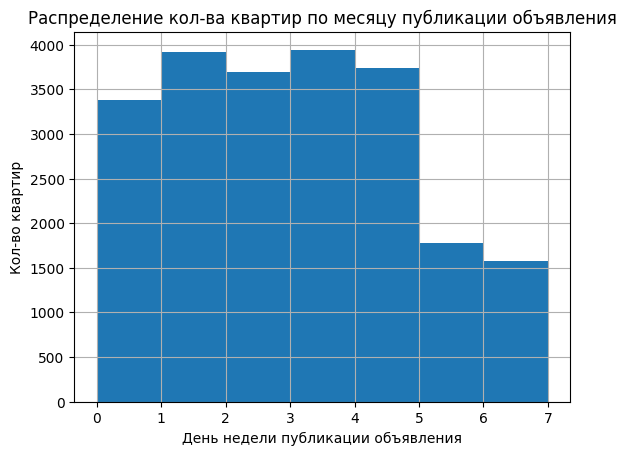

In [58]:
data_hist = data['weekday_exposition'].plot(kind='hist', bins=7, range=(0,7),\
                                     title='Распределение кол-ва квартир по месяцу публикации объявления', grid=True)
data_hist.set_xlabel('День недели публикации объявления')
data_hist.set_ylabel('Кол-во квартир')

Активнее всего продажи квартир проходят со вторника по четверг, незначительно меньше в пятницу, еще меньше в понедельник, количество проданных квартир в выходные дни отличается почти в 2 раза. Возможно, это связано с тем, что время работы инстанций необходимых для оформления документов в будние дни продолжительнее, а в выходные покупатели и продавцы больше времени закладывают на домашние дела, встречи с близкими и т.д.. 

Text(0, 0.5, 'Кол-во квартир')

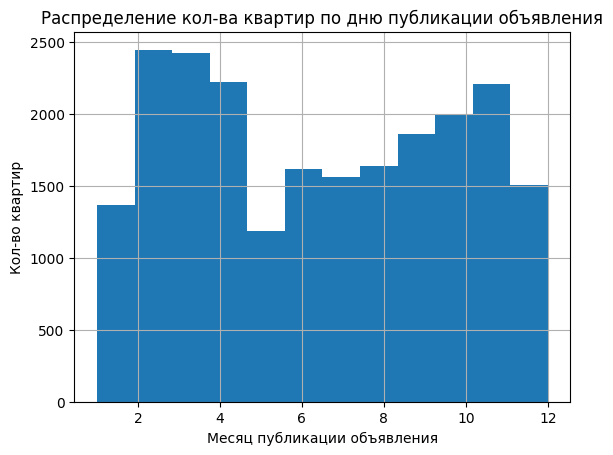

In [59]:
data_hist = data['month_exposition'].plot(kind='hist', bins=12, range=(1,12),\
                                     title='Распределение кол-ва квартир по дню публикации объявления', grid=True)
data_hist.set_xlabel('Месяц публикации объявления')
data_hist.set_ylabel('Кол-во квартир')

Меньше всего сделок совершается в январе, мае, декабре, что, вероятно, связано с большим количеством праздничных дней и подготовкой к Новому Году (в том числе, закрытие задач на работе, покупка подарков, новогодние корпоративы).Пик продаж приходится на февраль и постепенно снижается к лету(скорее всего, больше людей уезжают в отпуск), летом продажи примерно на одном уровне, рост наблюдаем с сентября по ноябрь включительно.

Изучили как различные параметры влияют на уровень продаж жилья в Петербурге и Ленинградской области:

`Преобладают квартиры площадью от 30 до 45 м², вторые по распространенности, - квартиры площадью от 50-65м², так же присутствуют квартиры площадью до 200 и даже до 900м². Самая распространенная площадь кухни 9-10.5 м², чуть реже встречаются квартиры площадью 7-8 м² и квартиры с площадью кухни более 10.5 м².
Стоимость в среднем составляет 3-5 млн рублей, однако есть варианты стоимостью больше 70 млн рублей. 
Большая часть объявлений приходится на 1- и 2-комнатные квартиры, квартиры с большим количеством комнат встречаются реже.
Высота потолков в объявлениях стандартная: от 2.4 до 2.75 м. В Петрбурге в зданиях старого фонда можно найти квартиры с высотой потолка в 2 раза больше стандартной.
Основное распределение квартир по этажам с 1-5. Большая часть жилья располагаются на расстоянии до 20 км от центра города, до ближайшего аэропорта 12 - 28км, до ближайшего парка составляет от 100 - 700 метров(большая доля объявлений - квартиры в Санкт-Петербурге, где общая площадь зелёных насаждений превышает 31 тысячу га).
Активнее всего продажи квартир проходят со вторника по четверг, незначительно меньше в пятницу, еще меньше в понедельник, количество проданных квартир в выходные дни отличается почти в 2 раза. Возможно, это связано с тем, что время работы инстанций необходимых для оформления документов в будние дни продолжительнее.
Касаемо распределения продаж по месяцам: меньше всего сделок совершается в январе, мае, декабре, что, вероятно, связано с большим количеством праздничных дней и подготовкой к Новому Году.Пик продаж приходится на февраль и постепенно снижается к лету(скорее всего, больше людей уезжают в отпуск), летом продажи примерно на одном уровне, рост наблюдаем с сентября по ноябрь включительно.
`

#### 4.2. Изучим, **как быстро продавались квартиры**. <a id='4.2'></a>

count    22036.000000
mean       166.821928
std        204.207956
min          1.000000
25%         45.000000
50%         95.000000
75%        195.000000
max       1580.000000
Name: days_exposition, dtype: float64

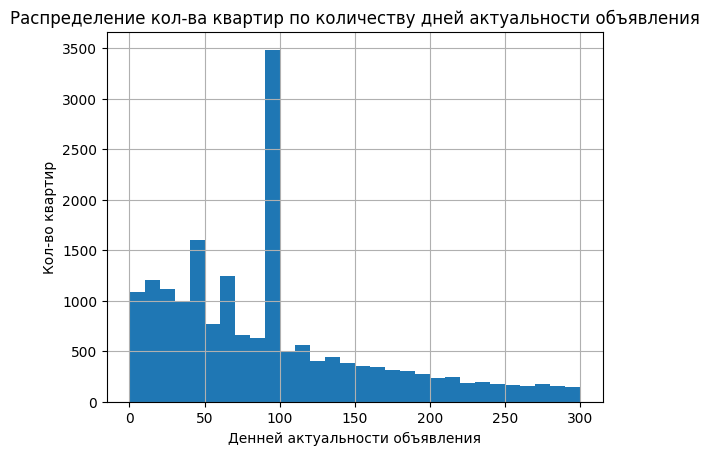

In [60]:
data_hist = data['days_exposition'].plot(kind='hist', bins=30, range=(0,300),\
                                     title='Распределение кол-ва квартир по количеству дней актуальности объявления', grid=True)
data_hist.set_xlabel('Денней актуальности объявления')
data_hist.set_ylabel('Кол-во квартир')
#
data['days_exposition'].describe()

- Среднее значение равно `167.662368`
- Медиана равна `95` (соответсвует второму квартилю)


Так как в выборке встречаются выдающиеся значения, лучше для анализа использовать медиану, в сравнении со средним значением. 

В среднем продажа квартиры занимает около 3 месяцев.
Быстрыми можно считать продажи от 1 дня (минимальное значение) до 45 дней(первый квартиль), а необычно долгими - от третьего квартиля +1.5 межквартильных размаха до максимального значения, т.е. от  227 дней (8 месяцев) до 53 месяцев (максимальное количество дней актуальности обхявления 1580, а это почти 4,5 года!).
Отметим, что те самые выдающиеся значения на графике (40-50 дней, 60-70 дней, 90-100 дней) могут быть обусловлены планами продаж риэлторских агенств.

#### 4.3.  Определим, какие факрторы больше всего влияют на общую стоимость объекта <a id='4.3'></a>

Изучим, зависит ли общая стоимость от:

-`общей площади`
    

0.7653981581763024

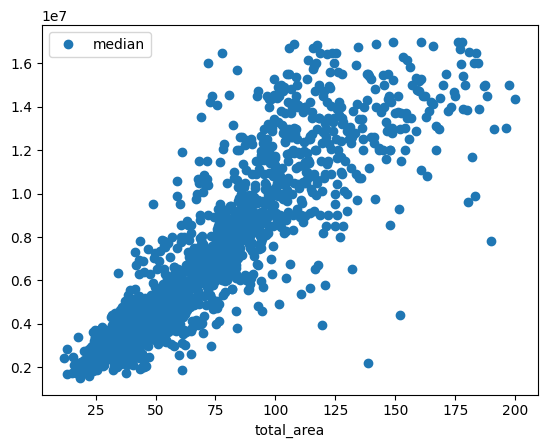

In [61]:
pt_total_area = data.pivot_table(index = 'total_area',\
                                          values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_total_area.columns = ['mean', 'count', 'median']
pt_total_area.plot(y = 'median', style = 'o')

pt_total_area.sort_values('median', ascending = False)
data['total_area'].corr(data['last_price'])

 Значение коэффициента 0.7 соответствует высокой положительной крреляции. А значит, с увеличением площади стоимость увеличивается.

-`жилой площади`

0.6359003334963828

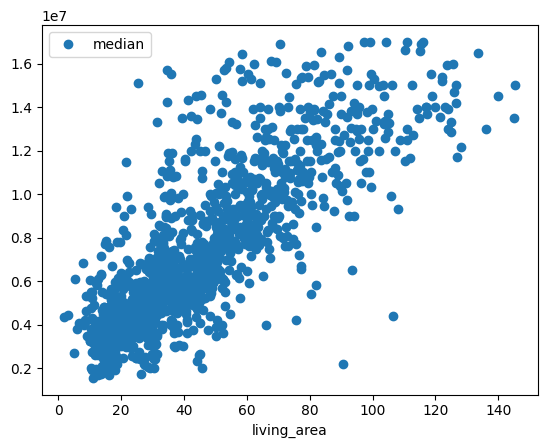

In [62]:
pt_living_area = data.pivot_table(index = 'living_area',\
                                          values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_living_area.columns = ['mean', 'count', 'median']
pt_living_area.plot(y = 'median', style = 'o')

pt_living_area.sort_values('median', ascending = False)
data['living_area'].corr(data['last_price'])

Зависимость между величинами прямая, сила связи средняя. Жилая площадь влияет на общую стоимость, с увеличением первой, увеличивается вторая. 


-`площади кухни`

0.5511236989647881

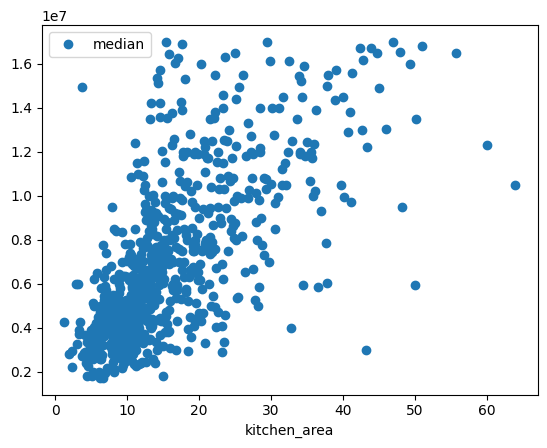

In [63]:
pt_kitchen_area = data.pivot_table(index = 'kitchen_area',\
                                          values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_kitchen_area.columns = ['mean', 'count', 'median']
pt_kitchen_area.plot(y = 'median', style = 'o')

pt_kitchen_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

Наблюдаеся средняя зависимость цены от площади кухни. С увеличением площади кухни, общая стоимость увеличивается.

-`количества комнат`

0.5004533038277265

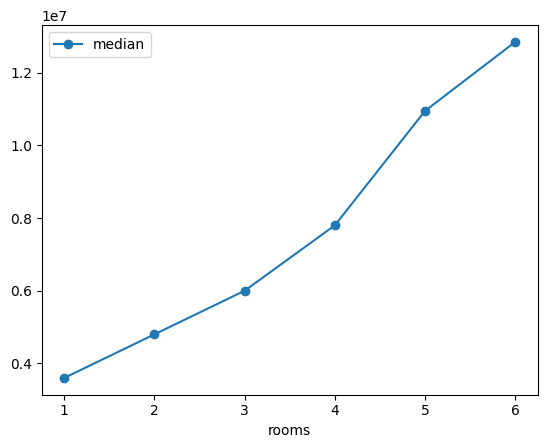

In [64]:
pt_rooms = data.pivot_table(index = 'rooms',\
                                          values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_rooms.columns = ['mean', 'count', 'median']
pt_rooms.plot(y = 'median', style = 'o-')

pt_rooms.sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

Стоимость жилья увеличивается с увеличением количества комнат.

-`этажа, на котором расположена квартира (первый, последний, другой)`

,mean,count,median
floor_type,,,
другой,5.566028e+06,16413,4750000.0
последний,5.228438e+06,2952,4350000.0
первый,4.541479e+06,2671,4000000.0


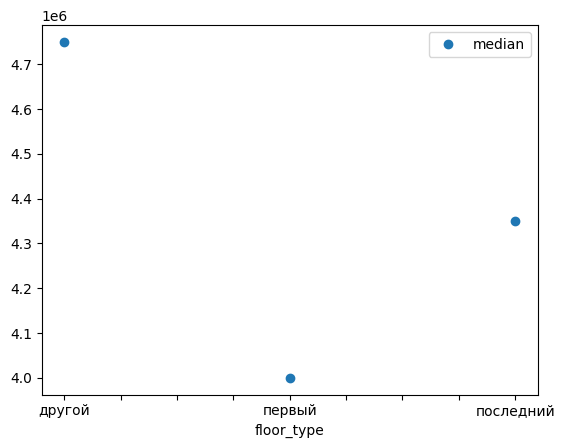

In [65]:
pt_floors_total = data.pivot_table(index = 'floor_type',\
                                          values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_floors_total.columns = ['mean', 'count', 'median']
pt_floors_total.plot(y = 'median', style = 'o')

pt_floors_total.sort_values('median', ascending = False)

Дешевле всего стоят квартиры на первом этаже, следубщие по стоимости - квартиры на последнем этаже и самое дорогое жилье расположено ни на 1, ни на последнем этажах.

-`даты размещения`
от дня недели

In [66]:
data['weekday_exposition'].unique()

array([3, 1, 0, 2, 6, 5, 4])

,mean,count,median
weekday_exposition,,,
1,5.454792e+06,3924,4700000.0
2,5.439346e+06,3693,4650000.0
0,5.370560e+06,3381,4600000.0
3,5.463077e+06,3945,4600000.0
5,5.311546e+06,1776,4600000.0
4,5.330522e+06,3740,4550000.0
6,5.293970e+06,1577,4530000.0


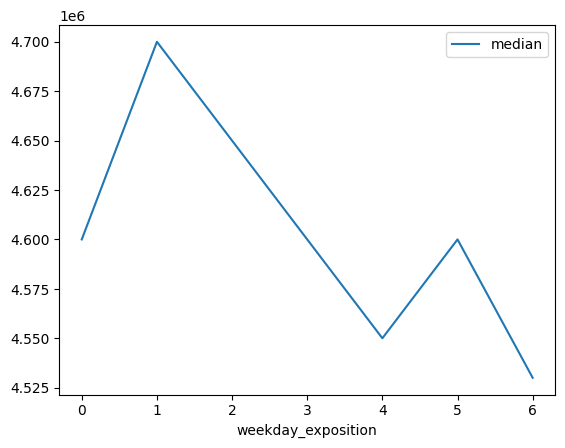

In [67]:
data['weekday_exposition'].astype(int)
pt_weekday_exposition = data.pivot_table(index = 'weekday_exposition',\
                                        values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_weekday_exposition.columns = ['mean', 'count', 'median']
pt_weekday_exposition.plot(y = 'median')

pt_weekday_exposition.sort_values('median', ascending = False)

Самая низкая стоимость жилья наблюдается в воскресенье, растет ко вторнику, когда и достигает своего пика,  воскресенью, снижается к пятнице, в субботу повышается. Вероятно, такая закономерность связана со спросом на жилье. Комментарии касаемо спроса мы оставляли под графиком `Распределение кол-ва квартир по месяцу публикации объявления`.

от месяца

,mean,count,median
month_exposition,,,
4,5.521133e+06,2220,4785000.0
9,5.534003e+06,1858,4650000.0
11,5.440216e+06,2208,4650000.0
3,5.406210e+06,2425,4640000.0
2,5.367454e+06,2447,4600000.0
7,5.370094e+06,1563,4600000.0
12,5.348759e+06,1504,4600000.0
1,5.364266e+06,1370,4562500.0
8,5.425791e+06,1635,4550000.0


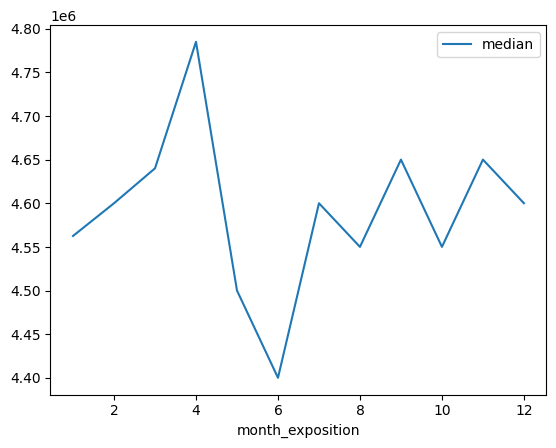

In [68]:
pt_month_exposition  = data.pivot_table(index = 'month_exposition',\
                                        values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_month_exposition.columns = ['mean', 'count', 'median']
pt_month_exposition.plot(y = 'median')

pt_month_exposition.sort_values('median', ascending = False)

В январе стоимость жилья чуть выше среднего, растет к марту и достигает своего пика в апреле, затем стремительно падает к июню (что связано со спросом, как мы помним из графика `Распределение кол-ва квартир по месяцу публикации объявления` активность продаж в январе и мае, июне минимальна, вероятно, из-за праздничных дней), в летние месяцы и в ноябре стоимость изменяется скачкообразно, то увеличивается, то незначительно снижается.

от года

,mean,count,median
year_exposition,,,
2014,7.381871e+06,107,6200000.0
2015,5.930346e+06,1063,5100000.0
2019,5.755835e+06,2672,5000000.0
2018,5.293603e+06,7959,4575000.0
2017,5.288222e+06,7655,4490000.0
2016,5.361751e+06,2580,4485000.0


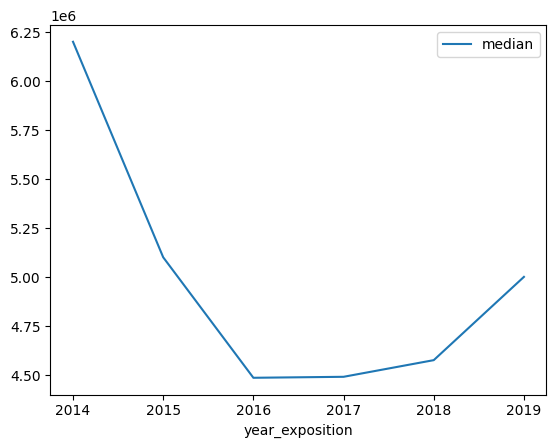

In [69]:
pt_year_exposition  = data.pivot_table(index = 'year_exposition',\
                                        values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_year_exposition.columns = ['mean', 'count', 'median']
pt_year_exposition.plot(y = 'median')

pt_year_exposition.sort_values('median', ascending = False)

В 2014 году после присоединения к РФ Крыма произошло значительное падение цен на нефть и введение санкций. При этом выросла кредитная нагрузка, которая составляла около 15-18% годовых. Также падение рубля привело к увеличению стоимости долларовой ипотеки. 
С чем и связана максимальная стоимость жилья в 2014 году. К 2016 году политическая ситуация относительно стабилизировалась и стоимость жилья в Санкт-Петербурге и Ленинградской области достигла своего минимума в рассматриваемом периоде. После 2016 года сновва наблюдается повышение стоимости, большое влияние оказывает инфляция.

**Таким образом, большее влияние общую стоимость квартиры оказывает** `общая площадь квартиры, чуть менее выражена положительная связь между стоимостью квартиры и жилой площадью, площадью кухни, коичеством комнат и дата размещения публикации (по большей мере год, месяц и день недели).
Дешевле всего стоят квартиры на первом этаже, следубщие по стоимости - квартиры на последнем этаже и самое дорогое жилье расположено ни на 1, ни на последнем этажах.`

####  4.4. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра <a id='4.4'></a>

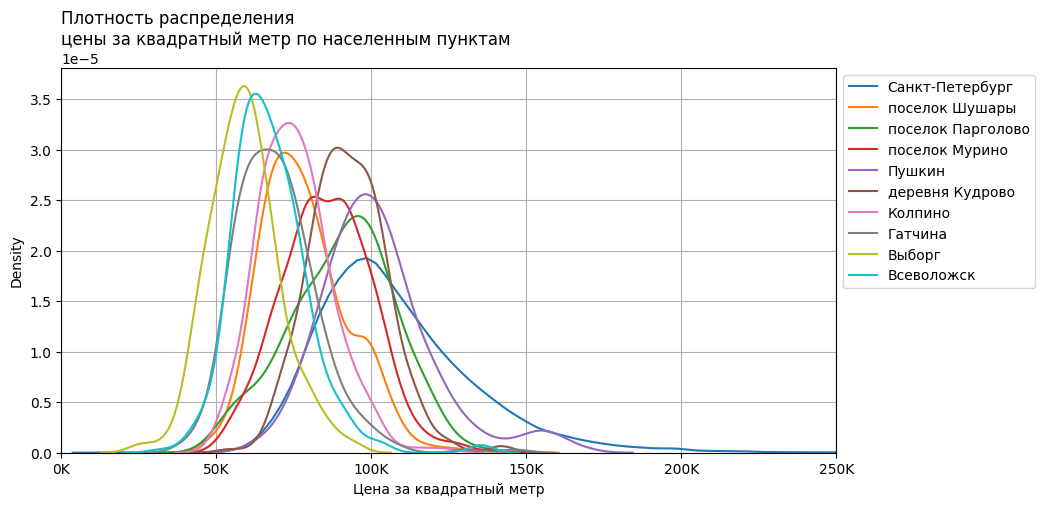

In [70]:
# топ-10 населенных пунктов по к-ву объявлений
df_short = data[data.locality_name.isin(data.locality_name.value_counts().index[:10])] 
fig, ax = pl.subplots(figsize=(10, 5)) 

# Density plot цены в каждом населенном пункте
for locality in df_short.locality_name.unique():
    sb.kdeplot(df_short[df_short.locality_name == locality].price_one_meter2, label = locality)
pl.grid(True) # сетка
pl.legend(loc = 'upper left', bbox_to_anchor = (1,1)) # положение легенды
pl.title('Плотность распределения\nцены за квадратный метр по населенным пунктам', loc = 'left') # название графика
pl.xlabel('Цена за квадратный метр') # подпись оси x
pl.xlim((0,250000)) # ограничение значений оси X
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{}'\
                                           .format(int(x/1000)) + 'K')) # форматирование подписей на оси X
pl.show()
    

Ожидаемо, `самая высокая стоимость одного квадратного метра в Санкт-Петербурге`, стоимость снижается с увеличением расстояния, за Петербургом следуют населенные пункты, располагающиеся в непосредственной близости от Северной Столицы, второй по уровню цен на жилье - город Пушкин, далее - поселки примыкающие к Санкт-Петербургу, Гатчина, Всеволожск,`минимальная стоимость` из топ-10 населенных пунктов по количеству обявлений `в Выборге`.

#### 4.5. Опишем, как стоимость объектов зависит от расстояния до центра города. <a id='4.5'></a>

,price_one_meter2
city_centers_nearest_km,
0,126046.385965
1,125478.748663
2,115794.628000
3,114385.672489
4,123213.637978
5,123695.745455
6,125441.018568
7,122533.276353
8,115979.574919


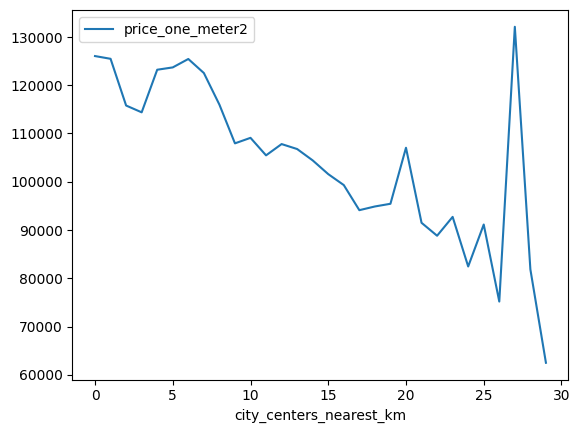

In [71]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].astype('int')
pt_km = data.query('locality_name == "Санкт-Петербург" and city_centers_nearest_km < 80')\
.pivot_table(index = 'city_centers_nearest_km', values = 'price_one_meter2', aggfunc = 'mean')
pt_km.plot()
pt_km

`Чем меньше расстояние до центра, тем выше цена`, при этом, стоимость падает примерно до 27 км (что, совпадает с территориальными границами Санкт-Петербурга), на данном отрезке все же встречаются  расстояния с повышением и некоторым снижением стоимости, что, вероятно, связано с развитостью инфраструктуры (дальность от метро, парков и т.д.), жк премиального класса, снижение стоимости - наоборот. 
Объявления с указанным расстоянием больше 27 км, с увеличением расстояния возрастают в цене. Скорее всего, на относилтельно небольших расстояниях до центра Петербурга(близлежащие поселки, деревни), играет роль транспортая доступность до города, с увеличением расстояния стоимость формируется с учетом других показателей, не зависящих от Санкт-Петербурга.

### 5. Общий вывод  <a id='end'></a>

На этапе предобработки данных мы изменили стиль заголовков, определили и по возможности заменили пропуски в таблице, выделили предположительные приичины появления пустых ячеек. 

**Пропуски в данных могли появиться по следующим причинам:**
1. Ошибки при заполнении таблицы пользователями(например, при отсутствии балкона в таблице оставили пустую ячейку, та же ситуация со столбцом "is_apartment", где вместо false пропущено значение) 
2. Пропуски в столбцах, занесенных в датафрейм автоматически, могли появиться по причине отсутствия картографических данных
3. Кроме того, возникновение пропусков может быть связано  с техническими ошибками при формировании таблицы (сбой во время выгрузки данных на анализ или при объединении данных в единый файл)

Изменили типы данных, где это было необходимо. После чего обнаружили и устранили редкие и выбивающиеся значения в столбцах.

Изучили как различные параметры влияют на уровень продаж жилья в Петербурге и Ленинградской области:
Преобладают квартиры площадью от 30 до 45 м², вторые по распространенности, - квартиры площадью от 50-65м², так же присутствуют квартиры площадью до 200м². Самая распространенная площадь кухни 9-10.5 м², чуть реже встречаются квартиры площадью 7-8 м² и квартиры с площадью кухни более 10.5 м².

Стоимость в среднем составляет 3-5 млн рублей, однако есть варианты стоимостью больше 70 млн рублей. 
Большая часть объявлений приходится на 1- и 2-комнатные квартиры, квартиры с большим количеством комнат встречаются реже.
Высота потолков в объявлениях стандартная: от 2.4 до 2.75 м. В Петрбурге в зданиях старого фонда можно найти квартиры с высотой потолка в 2 раза больше стандартной.

Основное распределение квартир по этажам с 1-5. Квартиры на первом(менее безопасны) и последнем (риск протечки кровли) этажах приобретают реже.Большая часть жилья располагаются на расстоянии до 20 км от центра города, до ближайшего аэропорта 12 - 28км, до ближайшего парка составляет от 100 - 700 метров(большая доля объявлений - квартиры в Санкт-Петербурге, где общая площадь зелёных насаждений превышает 31 тысячу Га).

Активнее всего продажи квартир проходят со вторника по четверг, незначительно меньше в пятницу, еще меньше в понедельник, количество проданных квартир в выходные дни отличается почти в 2 раза. Возможно, это связано с тем, что время работы инстанций необходимых для оформления документов в будние дни продолжительнее.

Касаемо распределения продаж по месяцам: меньше всего сделок совершается в январе, мае, декабре, что, вероятно, связано с большим количеством праздничных дней и подготовкой к Новому Году.Пик продаж приходится на февраль и постепенно снижается к лету(скорее всего, больше людей уезжают в отпуск), летом продажи примерно на одном уровне, рост наблюдаем с сентября по ноябрь включительно.

Важным показателем в анализе рынка недвижимости является общая стоимость квартиры. 

Большее влияние на этот показатель оказывает общая площадь квартиры, чуть менее выражена положительная связь между стоимостью квартиры и жилой площадью, площадью кухни, коичеством комнат и датой размещения публикации (по большей мере год, месяц и день недели): самая низкая стоимость жилья наблюдается в субботу, растет к воскресенью, снижается ко вторнику и достигает своего пика в среду. Вероятно, такая закономерность связана со спросом на жилье.
Дешевле всего стоят квартиры на первом этаже, следубщие по стоимости - квартиры на последнем этаже и самое дорогое жилье расположено ни на 1, ни на последнем этажах.

Другим важнейшим показателем является стоимость квадратного метра жилья. 

При этом, ожидаемо, `самая высокая стоимость одного квадратного метра в Санкт-Петербурге`, стоимость снижается с увеличением расстояния, за Петербургом следуют населенные пункты, располагающиеся в непосредственной близости от Северной Столицы, второй по уровню цен на жилье - город Пушкин, далее - поселки примыкающие к Санкт-Петербургу, Гатчина, Всеволожск,`минимальная стоимость` из топ-10 населенных пунктов по количеству обявлений `в Выборге`.

Стоимость квадратног метра зависит от расстояния до центра города: чем меньше расстояние до центра, тем выше цена, при этом, стоимость падает примерно до 27 км (что, совпадает с территориальными границами Санкт-Петербурга), на данном отрезке все же встречаются расстояния с повышением и некоторым снижением стоимости, что, вероятно, связано с развитостью инфраструктуры (дальность от метро, парков и т.д.), жилыми комплексами премиального класса, снижение стоимости - наоборот. Объявления с указанным расстоянием больше 27 км, с увеличением расстояния возрастают в цене. Скорее всего, на относилтельно небольших расстояниях до центра Петербурга(близлежащие поселки, деревни), играет роль транспортая доступность до города, с увеличением расстояния стоимость формируется с учетом других показателей, не зависящих от Санкт-Петербурга.


Полученые данные можно использовать в рекламных целях, например, запускать больше рекламных капманий в дни недели и месяцы с наиболее активными продажами. 